<a href="https://colab.research.google.com/github/nickdalfarra/4X_QLearning/blob/claire/CheckingStationarityWithADF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re
import pandas as pd
from pandas import DataFrame
import numpy as np
import datetime
from random import randint
from google.colab import files


In [3]:
file = files.upload()

Saving USD_CAD.csv to USD_CAD.csv


In [6]:
# load market data from Yahoo Finance (https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC)
#get data from my computer 
USDCAD = pd.read_csv(io.BytesIO(file['USD_CAD.csv']))
USDCAD['Date'] = pd.to_datetime(USDCAD['Date'])
#USDCAD_DF['Time'] = pd.to_datetime(USDCAD_df['Time']+':00','%H:%M:%S')
#USDCAD_df.drop(['Time', 'Unknown'], axis=1)
#cut_off_date = '2010-01-01' 
#gspc_df = gspc_df[gspc_df['Date'] >= cut_off_date]

USDCAD_df = USDCAD.head(262)

USDCAD_df.tail()


,Date,Price,Open,High,Low,Change %
257,2019-01-07,1.3298,1.3375,1.3391,1.3276,-0.57%
258,2019-01-04,1.3374,1.3488,1.3497,1.3371,-0.85%
259,2019-01-03,1.3489,1.3577,1.3657,1.3467,-0.66%
260,2019-01-02,1.3578,1.3637,1.3662,1.3564,-0.45%
261,2019-01-01,1.3639,1.3636,1.3646,1.3635,0.01%


1.2988
1.3066


count    261.000000
mean       0.000193
std        0.003182
min       -0.009627
25%       -0.001712
50%        0.000077
75%        0.001836
max        0.009834
Name: Price, dtype: float64

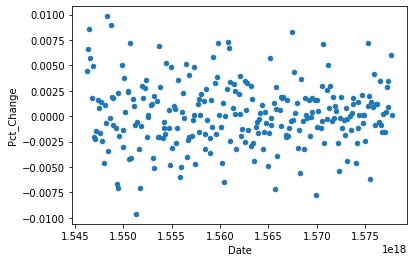

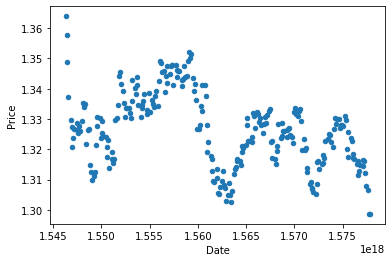

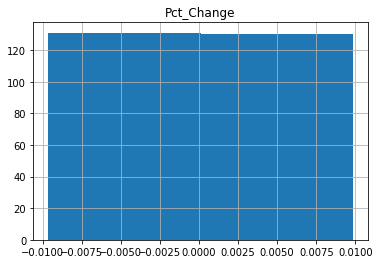

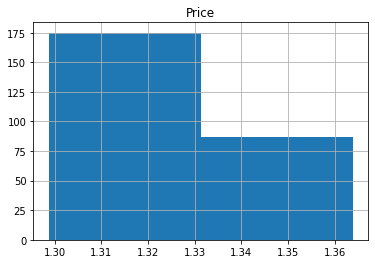

In [7]:
Gap = USDCAD_df['Price'].pct_change()
Price = USDCAD_df['Price']
Date = pd.to_datetime(USDCAD_df['Date']).astype(int)

Data = {'Pct_Change': Gap, 
        'Price':Price,
        'Date': Date, 
       }
  
df = DataFrame(Data,columns=['Pct_Change','Price','Date'])
df.sort_values(by=['Date'], ascending = 'True')
num = 1
print (df.loc[num,'Price'])
num += 1 
print(df.loc)
print (df.loc[num,'Price'])
df.plot(x='Date', y ='Pct_Change', kind = 'scatter')	
df.plot(x='Date', y ='Price', kind = 'scatter')	
df.hist(column='Pct_Change', bins=2)
df.hist(column='Price', bins=2)
Gap.describe()

In [0]:
USDCADhead = Gap.head(1304)
USDCADhead.head()
USDCADhead.describe()

count    1303.000000
mean       -0.000063
std         0.004824
min        -0.019145
25%        -0.002946
50%        -0.000223
75%         0.002701
max         0.019737
Name: Price, dtype: float64

In [0]:
USDCADtail = Gap.tail(1304)
USDCADtail.head()
USDCADtail.describe()

count    1304.000000
mean       -0.000063
std         0.005101
min        -0.025227
25%        -0.002915
50%         0.000000
75%         0.002932
max         0.021465
Name: Price, dtype: float64

In [0]:
USDCADhead.describe()

,Price,Open,High,Low
count,1304.000000,1304.000000,1304.000000,1304.000000
mean,1.305062,1.304959,1.310008,1.300125
std,0.041338,0.041510,0.041277,0.041534
min,1.176400,1.161300,1.178700,1.159800
25%,1.281200,1.281175,1.286075,1.275050
50%,1.311150,1.311100,1.316150,1.306400
75%,1.330400,1.330300,1.334225,1.326425
max,1.457900,1.458200,1.469300,1.448700


In [0]:
USDCADtail.describe()

,Price,Open,High,Low
count,1304.000000,1304.000000,1304.000000,1304.000000
mean,1.030725,1.030626,1.034918,1.026595
std,0.045516,0.045362,0.045433,0.045384
min,0.943800,0.943800,0.947600,0.940500
25%,0.996175,0.995700,0.999500,0.992300
50%,1.023500,1.023700,1.028000,1.018100
75%,1.054525,1.054200,1.060075,1.050000
max,1.167100,1.167500,1.167500,1.161000
